['ex1data1.txt', 'ex1data2.txt']


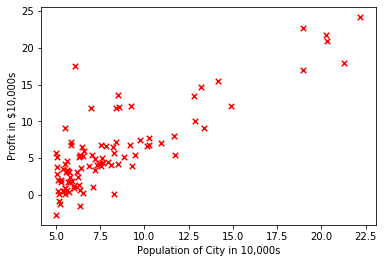

[32.07273388]
[[-3.63029144]
 [ 1.16636235]]
[4.48338826]


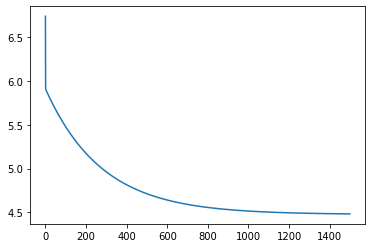

In [6]:
# In[1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# In[2]:


import os
print(os.listdir("C:\\Users\\abc\\Desktop\\input")) #this is for accessing that directory


# In[3]:


data=pd.read_csv("input\\ex1data1.txt", header=None) #read from dataset
X=data.iloc[:,0] #read first column, iloc = index location
y=data.iloc[:,1] #read second column
m=len(y)
data.head()


# In[4]:


#Plot Data
plt.scatter(X,y,marker='x',s=30,c='red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()


# In[5]:


X=X[:,np.newaxis] #adds a new dimension with null value...in this case it adds a new column at pos 0..and pre-existing columns are shifted by 1
y=y[:,np.newaxis]
theta=np.zeros((2,1))
iterations=1500
alpha= 0.01
ones=np.ones((m,1))
X=np.hstack((ones,X))#stacks a new columns at pos 0


# In[6]:


def computeCost(X,y,theta):
    temp=np.dot(X,theta)-y
    return sum(np.power(temp,2))/(2*m)
J=computeCost(X,y,theta)
print(J)# this will print J calculated with theta0= 0 and theta1= 0


# In[7]:

J_history=np.zeros( (iterations,1) )
def gradientDescent(X,y,theta,alpha,iterations):
    
    for i in range(iterations):
        temp = np.dot(X,theta)-y
        temp = np.dot(X.T,temp)
        theta=theta - (alpha/m) * temp
        J_history[i]=computeCost(X,y,theta)
        
    return theta
theta=gradientDescent(X,y,theta,alpha,iterations)
print(theta)
    


# In[8]:


J=computeCost(X,y,theta);
print(J) # this will print J calculated with minimum values of theta

plt.plot(J_history)


# In[9]:




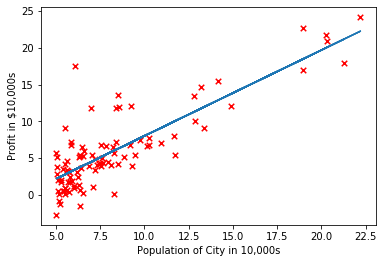

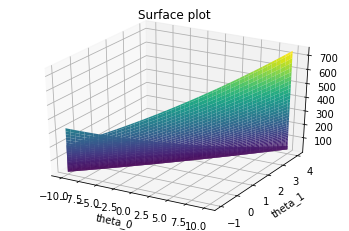

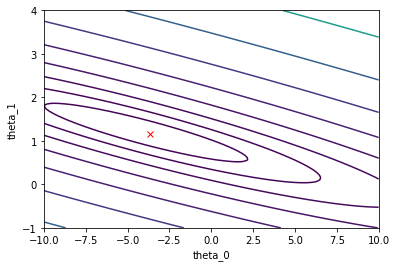

In [7]:
#Plot showing the best fit line
plt.scatter(X[:,1],y,s=30,marker='x',c='red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1],np.dot(X,theta)) #plot(x,y)...y=theta0+theta1*x1
#plt.savefig('graph.png')
plt.show()


# In[10]:


# visualising J(theta0, theta1 )
theta0_vals = np.linspace(-10, 10, 100) # linspace is use range -10 to 10 with 100 points in between
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros( ( len(theta0_vals), len(theta1_vals) ) )
t=np.zeros((2,1))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t[0]=theta0_vals[i]
        t[1]=theta1_vals[j]
        J_vals[i,j]=computeCost(X,y,t)
J_vals=J_vals.T

ax = plt.axes(projection='3d')
ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.xlabel('theta_0'); plt.ylabel('theta_1');
plt.show()


# In[11]:


#contour plot
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('theta_0'); plt.ylabel('theta_1');
plt.plot(theta[0], theta[1],c='red',marker='x');
